# PROJECT: AN INSIGHT INTO SHORT LET PRICING: AIRBNB SEATTLE CASE STUDY

In this project I would be exploring the dataset of airbnb listings in the Seattle. There are 3 dataset to be explored in this project. The data in this project was downloaded [here](https://www.kaggle.com/airbnb/seattle/data). The result of this project would give insight to people that want to get into the business of shortlet to understand how prices are determined and factors that affect it. 

## PROJECT MOTIVATION

This project is meant to answer some questions that potention shortlet owners would have, giving clearity to the pricing system of shortlets using airbnb as a case study. Some of these questions are;
> 1. How does prices differ among days of the week?
> 2. What room type has the highest price?
> 3. What factors affect the price of shortlets?
> 4. What are the most popular amenity?
> 5. What is the user experience of airbnb users in Seattle?




In [25]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
#load the data
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

In [3]:
#explore the dataset to understand the data
calendar.head()


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


## RESEARCH QUESTIONS 1

### How does prices differ among days of the week?

To answer this question we would be using the calendar dataset. we would be performing to data transformation first to make the dataset workable. Then we would be using seaborn barplot to explore the average price for each day. Also we would like to see if there is a difference between the prices on weekday and weekend.

In [6]:
# explore the calender dataset
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [7]:
# explore the data types of individual variables
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [8]:
# change the price to a float
def float_price(x):
    '''
    input: dollar value with string dtype
    output: value in float
    '''
    if type(x)==str:
        x=x[1:].replace(",","")
        x=float(x)
    return x

In [9]:
calendar['price']=calendar['price'].apply(lambda x: float_price(x))

In [10]:
# change the data variable to datetime
calendar['date'] = pd.to_datetime(calendar['date'],format="%Y-%m-%d")

In [11]:
# encode the day name in the data
calendar['day'] = calendar['date'].dt.day_name()

In [12]:
#check the data
calendar.head()

,listing_id,date,available,price,day
0,241032,2016-01-04,t,85.0,Monday
1,241032,2016-01-05,t,85.0,Tuesday
2,241032,2016-01-06,f,NaN,Wednesday
3,241032,2016-01-07,f,NaN,Thursday
4,241032,2016-01-08,f,NaN,Friday


In [13]:
# create a function to help encode plot label
def label (x,y,z):
    """
    Args:
    x(str): x-axis title
    y(str): y-axis title
    z(str): main title
    
    returns:
    None
    
    """
    
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(z)
    plt.show()

In [14]:
#choose the color of the bars I would use in the barplot
base_color = sns.color_palette()[0]

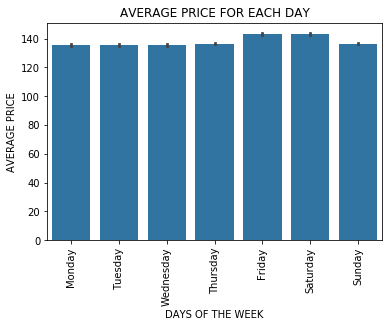

In [15]:
#plot the average prices of each day of the week
sns.barplot(data = calendar, x = 'day', y = 'price', color = base_color)
locs, labels = plt.xticks(rotation=90)
plt.savefig('week_day.png', dpi = 100,bbox_inches='tight')
label('DAYS OF THE WEEK','AVERAGE PRICE','AVERAGE PRICE FOR EACH DAY');

From the plot above we can see that there are no significant difference between the prices of listings for each day. However, Fridays and Saturday have the highest prices but the numerical difference is not much

In [16]:
#encode the days of the week with numbers
calendar['day_num'] = calendar['date'].dt.weekday

In [17]:
# encode the weekends with dummies and I include Friday as a weekend
calendar['weekend'] = calendar['day_num'].apply(lambda x:1 if x > 3 else 0)

In [18]:
calendar.head()

,listing_id,date,available,price,day,day_num,weekend
0,241032,2016-01-04,t,85.0,Monday,0,0
1,241032,2016-01-05,t,85.0,Tuesday,1,0
2,241032,2016-01-06,f,NaN,Wednesday,2,0
3,241032,2016-01-07,f,NaN,Thursday,3,0
4,241032,2016-01-08,f,NaN,Friday,4,1


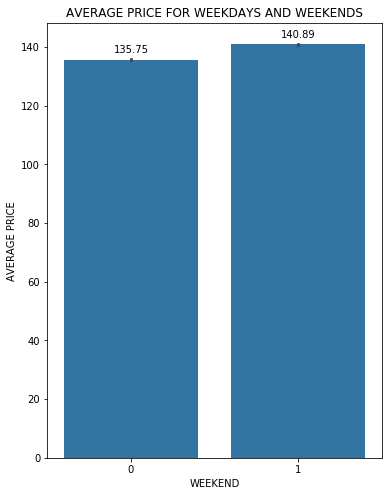

In [19]:
# plot a barchart showing the average price of weekdays and weekends
plt.figure(figsize=(6, 8))
splot = sns.barplot(data=calendar, x = 'weekend', y = 'price', color = base_color)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.savefig('week_end.jpg', bbox_inches='tight')
label('WEEKEND','AVERAGE PRICE','AVERAGE PRICE FOR WEEKDAYS AND WEEKENDS');

In [20]:
plt.savefig('week_end.jpg')

<Figure size 432x288 with 0 Axes>

There is a slight difference of about $5 between weekdays and weekends. Weekdays were encoded with 0s and weekends with 1, from the chart we can see that on weekends the average price is 140.89 and that of the weekdays is 135.75

## RESEARCH QUESTION 2
### How is price distributed among various room type?

To answer this question I would be making a violin plot to explore the spread of price across the various room type in the listings data set. Before carryingout this analysis I would be carrying out some data validation and transformation to make the data workable.

In [21]:
#transform the price variable to float
listings['price']=listings['price'].apply(lambda x: float_price(x))

In [22]:
#check
listings['price'].dtypes

dtype('float64')

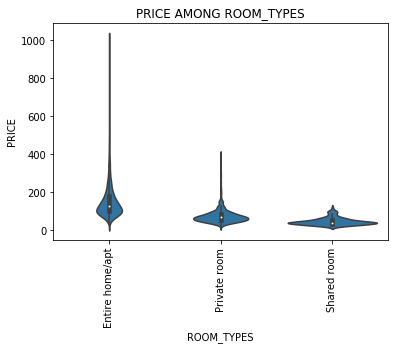

In [24]:
# create a violin plot showing the spread of price in the various room type
sns.violinplot(data= listings, y='price', x='room_type', color = base_color)
plt.xticks(rotation = 90)
plt.savefig('violin.jpg', bbox_inches='tight')
label('ROOM_TYPES','PRICE', 'PRICE AMONG ROOM_TYPES')

The distribution of the prices in private rooms and shared rooms are almost the same with a large chunk of prices in the two room types are in the same range. However, the price of apartments have a higher range

## RESEARCH QUESTION 3
### WHAT FACTORS AFFECT THE PRICE OF LISTINGS

To identify the factors that affect the price of listings I selected some numeric and categorical variables that are likely to affect the price of the variables in the listings dataset I used the following variables: host_is_superhost,accommodates,bedrooms, security_deposit,reviews_per_month

As usual I would be carrying out some data validation and transformation to make the data workable. 

In [26]:
# slice the variables that would be used to create the model 
model_var = listings[['price','instant_bookable','host_is_superhost','accommodates','bedrooms', 'security_deposit','reviews_per_month']]

In [27]:
#change the security_deposit variables to float 
model_var['security_deposit']=model_var['security_deposit'].apply(lambda x: float_price(x))

C:\Users\Expression\anaconda32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


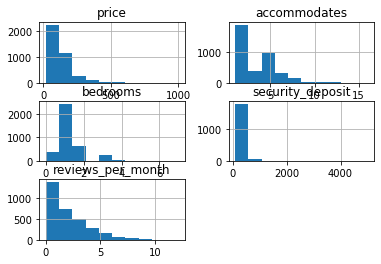

In [28]:
#explore the histogram of the dataset
model_var.hist();

From the histogram we can see that all the variables are skewed to the right

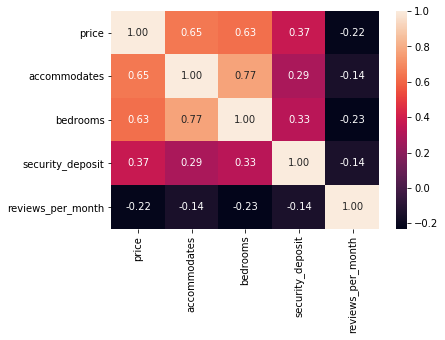

In [29]:
# create a heatmap showing the correlationship of the variables
sns.heatmap(model_var.corr(), annot=True, fmt=".2f")
plt.savefig('heatmap.jpg', bbox_inches='tight');

We can see a strong positive correlationship in the cases of the number of people the listing can contain (accommodates) and the bedrooms in a particular listing with a correlational coefficient of 0.65 and 0.63 respectively. There is also a positive correlation between price and the amount paid as security deposit. However, the is a negative correlationship between the reviews per month and the price. I would be creating a linear regression to further investigate and validate these claims

In [32]:
# transform the host_is_superhost to a dummy variable
model_var['host_is_superhost'].dtypes

dtype('O')

In [35]:
# use the get_dummies function to transform the variable to a dummy
dummy = pd.get_dummies(model_var['host_is_superhost'])

In [36]:
# encode the true variable to 1 and false to 0
model_var['host_is_superhost'] = dummy['t']

C:\Users\Expression\anaconda32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
model_var.head()

,price,instant_bookable,host_is_superhost,accommodates,bedrooms,security_deposit,reviews_per_month
0,85.0,f,0,4,1.0,NaN,4.07
1,150.0,f,1,4,1.0,100.0,1.48
2,975.0,f,0,11,5.0,1000.0,1.15
3,100.0,f,0,3,0.0,NaN,NaN
4,450.0,f,0,6,3.0,700.0,0.89


Next we will be dealing with missing variables

In [38]:
#view the missing variables
model_var.isnull().sum()

price                   0
instant_bookable        0
host_is_superhost       0
accommodates            0
bedrooms                6
security_deposit     1952
reviews_per_month     627
dtype: int64

I assumed that the listings with no sercurity deposit has no sercurity deposit in the bill. Therefore missing values in the security deposit variable will be filled with zeros uding fillna function. The nan values in the bedrooms and reviews per month would be filled with their respective mean.

In [39]:
#fill the nan in the security deposite variable with 0s(zeros)
model_var['security_deposit'] = model_var['security_deposit'].fillna(0)

C:\Users\Expression\anaconda32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
#fill the bredrooms variable with the mean of bedroom
model_var['bedrooms'].fillna(model_var['bedrooms'].mean(), inplace=True)

C:\Users\Expression\anaconda32\lib\site-packages\pandas\core\series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [41]:
# fill the reviews per month variable with the mean
model_var['reviews_per_month'].fillna(model_var['reviews_per_month'].mean(), inplace=True)

In [42]:
# check for nan variables
model_var.isnull().sum()

price                0
instant_bookable     0
host_is_superhost    0
accommodates         0
bedrooms             0
security_deposit     0
reviews_per_month    0
dtype: int64

In [43]:
#Split into explanatory and response variables
X = model_var[['host_is_superhost','accommodates','bedrooms', 'security_deposit','reviews_per_month']]
y = model_var['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model was 0.5094382218028182 on 1146 values.'

51% variability in the price is explain by the independent variables I used. Also I would like to make further investigations to understand the model I created to see if the independent variables have a statistical significant effect on the dependent variables

In [44]:
# run a linear regression 
# create an intercept
model_var['intercept'] = 1

C:\Users\Expression\anaconda32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## RESEARCH QUESTION 4
### What are the most popular amenity?

For this question I will simply make a wordcloud 

In [45]:
# tansform the datatype to str
listings['amenities'] = listings['amenities'].astype('str')

In [46]:
amenities = ' '.join(listings['amenities'])

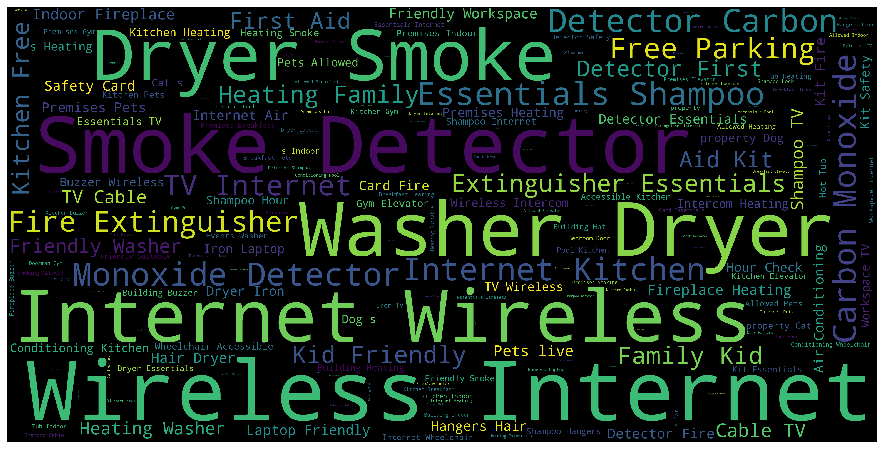

In [47]:
# create a word cloud
amenities_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black', height = 2000, width = 4000).generate(amenities)
plt.figure(figsize = (16,8))
plt.imshow(amenities_wordcloud)

plt.axis('off')
plt.savefig('wordcloud.jpg', bbox_inches='tight')
plt.show()

Some of the most popular are Wireless Internet, Dryer, Smoke Detector, Parking. These will serve as a guide 

## RESEARCH QUESTION 5

### WHAT IS THE USER EXPERIENCE OF AIRBNB IN SEATTLE LIKE?

In [48]:
# tansform the datatype to str
reviews['comments'] = reviews['comments'].astype('str')

In [49]:
comments = ' '.join(reviews['comments'])

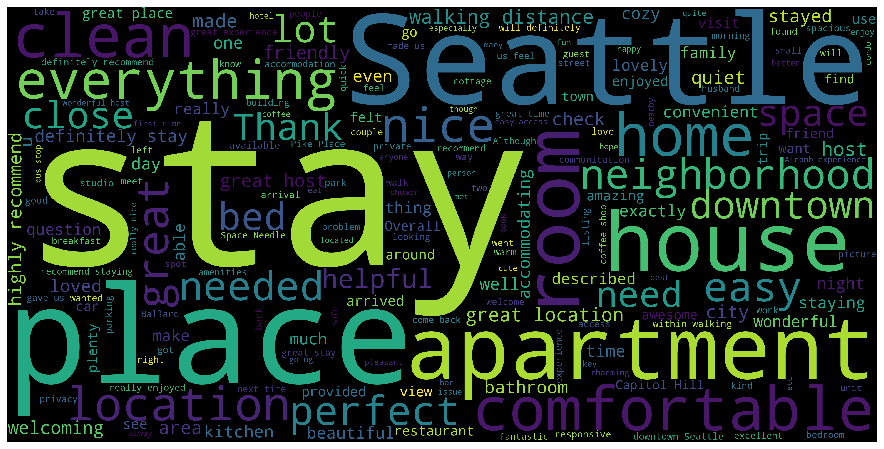

In [50]:
# create a word cloud
comments_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black', height = 2000, width = 4000).generate(comments)
plt.figure(figsize = (16,8))
plt.imshow(comments_wordcloud)

plt.axis('off')
plt.savefig('wordcloud2.jpg', bbox_inches='tight')
plt.show()

There are more positive words used by the users in the comments section words like nice, perfect, easy, thank and great stands out. This indicated that users have a positive experience using airbnb in Sattle